OBJECTIVE

To make a classifier that checks for the fraud detection on dataset

In [72]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load the dataset
fraud_data=pd.read_csv("C:/Users/USER/Desktop/creditcard_2023.csv")

In [74]:
#To view the last five columns
fraud_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [75]:
fraud_data.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [7]:
fraud_data.shape

(568630, 31)

In [8]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [9]:
fraud_data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [10]:
#In the Column, Class, 1 represent fraudelent detection while zero represents non fraudelent detetections.
# Filter fraudulent transactions
fraud = fraud_data.loc[fraud_data["Class"] == 1]

# Filter non-fraudulent transactions
normal = fraud_data.loc[fraud_data["Class"] == 0]



In [11]:
# Display the first 5 rows of fraudulent transactions
fraud.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,541,-0.478427,0.142165,-0.046838,0.683350,0.067820,-0.404898,-0.206496,0.184366,-0.762935,...,0.098977,-0.075191,-0.481489,0.678900,-0.011520,0.409021,0.075859,-0.447139,1534.53,1
623,623,-0.617111,-1.733888,1.150655,0.207829,0.903533,-0.171524,0.551679,-0.167744,0.338861,...,0.153856,0.369734,1.471004,-0.497633,0.377656,-0.328051,-0.512415,-0.013653,10554.68,1
4920,4920,-0.476617,0.088942,0.326333,0.220370,-0.026730,0.432409,0.646165,-0.240646,0.356997,...,-0.223141,-0.851929,0.153117,-0.127032,-0.334872,-1.353308,-0.192302,-0.470796,2785.98,1
6108,6108,-0.832953,-0.024254,-0.260967,0.323532,-0.117119,-0.589167,-0.390612,-0.207889,0.351702,...,0.120451,0.121804,-0.453630,-0.064071,0.331833,-1.671579,-1.060239,1.939783,15897.18,1
6329,6329,1.020308,0.425645,-0.554113,0.868349,2.367343,-0.360087,1.185828,-0.261569,-0.159521,...,-0.258401,-0.661236,-0.663639,-2.536292,2.502489,1.195597,-0.249226,0.254373,3492.59,1


In [12]:
#To show the sum of fraudelent detetections
fraud.sum()

id        1.211711e+11
V1       -1.437954e+05
V2        1.398483e+05
V3       -1.939300e+05
V4        2.092504e+05
V5       -9.628014e+04
V6       -1.237021e+05
V7       -1.396652e+05
V8        4.102490e+04
V9       -1.664726e+05
V10      -1.915331e+05
V11       2.059231e+05
V12      -2.185186e+05
V13      -2.021626e+04
V14      -2.290638e+05
V15      -1.078923e+04
V16      -1.630579e+05
V17      -1.354410e+05
V18      -1.165950e+05
V19       6.939602e+04
V20       5.113435e+04
V21       3.117236e+04
V22       4.008239e+03
V23       2.915533e+03
V24      -3.699125e+04
V25       1.758402e+04
V26       2.020114e+04
V27       6.084396e+04
V28       2.900688e+04
Amount    3.428157e+09
Class     2.843150e+05
dtype: float64

In [13]:
#To show the length of fraudelent detections in the dataset

len(fraud)

284315

In [14]:
#To show the length of non-fraudelent detections in the dataset
len(normal)

284315

Since we are Using logistic regression, we have to import other libraries

In [16]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [17]:
#Define the features, x and y
x = fraud_data.drop(columns=['Class'])     #All the columns except 'Class' are dropped
y = fraud_data["Class"]

In [18]:
#Splitting the dataset into two. 35% for testing and the remaining for training
x_train, x_test,  y_train , y_test= train_test_split(x,y, test_size =0.35,random_state=42)


In [19]:
# Check the shapes of the resulting datasets
print("Training set size:", x_train.shape)
print("Testing set size:", x_test.shape)


Training set size: (369609, 30)
Testing set size: (199021, 30)


In [20]:

clf=linear_model.LogisticRegression(C=1e5)

In [21]:
#Training the logistic regression model (stored in clf) using the training data.
clf.fit(x_train, y_train)

LogisticRegression(C=100000.0)

In [22]:
y_pred = np.array(clf.predict(x_test))
y=np.array(y_test)

In [23]:
#To  evaluate the performance of the model based on the predictions made.
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [24]:
#confusion matrix summarizes the performance of the classification algorithm.
print(confusion_matrix(y_test, y_pred))


[[65920 33518]
 [ 8375 91208]]


In [25]:
#Checking accuracy, we import the following
print(accuracy_score(y_test, y_pred))


0.7895046251400606


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.66      0.76     99438
           1       0.73      0.92      0.81     99583

    accuracy                           0.79    199021
   macro avg       0.81      0.79      0.79    199021
weighted avg       0.81      0.79      0.79    199021



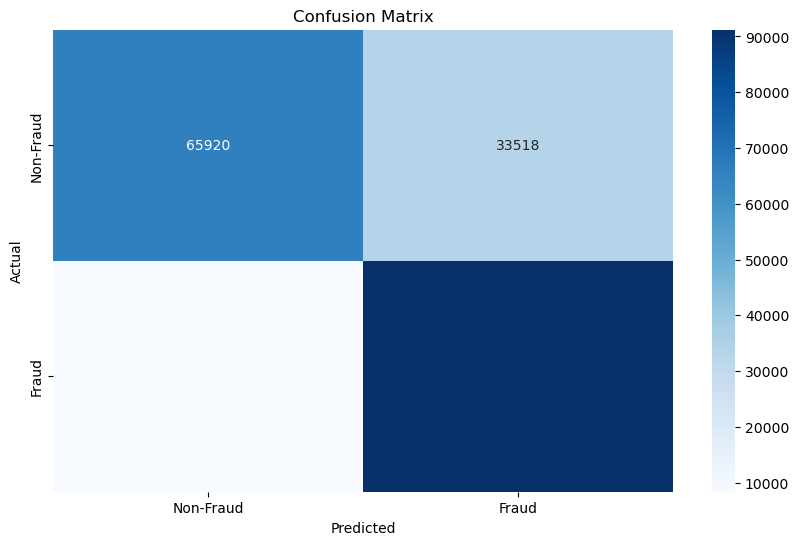

In [80]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()